# Response Themes for "What aspects of Jupyter Notebook make it difficult to use in your workflow?"

* Goal: Extract theme keywords from `difficult_aspects` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.difficult_aspects_1, df.difficult_aspects_2, df.difficult_aspects_3])

In [9]:
assert len(responses) == len(df) * 3

In [10]:
responses.isnull().value_counts()

True     4216
False     902
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below multiple times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(responses.sample(20, random_state=rs))

0) runnning notebooks in batch

1) Relatively hard installation, not simply an app

2) would be nice to be able to import one notebook into another

3) Lack of document structure manipulation

4) Terminal mode doesn't handle keyboard shortcuts well

5) Connecting to diverse data sources

6) Code reuse

7) no concrete status info on running calculations (What does my Python process do that has been running for ages now?)

8) Python 3 vs 2 problems

9) Out-of-order execution

10) Package updates

11) Very limited editing facilities (search-and-replace???)

12) Vanilla jupyter notebook is unwieldy with long notebooks (but mitigated by TOC extension, section folding,...)

13) Control over matplotlib graphs still a bit limited and clumsy

14) No emacs-style bindings for editing code

15) Deploying to the cloud requires a brain + setup time. Should be brainless and next to instantaneous

16) Losing state -- restarting the kernel

17) the kernel needs to be restarted to reload modules (though

In [13]:
themes = {
    'ux': ['(manipulating|mov(e|ing)|copy(ing)?) cells|rearranging', 'multi(ple)? cells?', 
           'cells (up and down|out of place)', 
           'mouse', 'right-click', 'tab function',
           'copy(-|&|\sand\s|\/)paste|c&p|and paste', 'double(\s|-)?click(ing)?',
           'modal',  
           'muddle|messy|clutter|clunky',
           '(wasted|screen) space|bloated ui|too much whitespace|margins|width', 
           'scroll(\s)?bar|scroll(ing)?', 
           'jump(ing)?', 'status', 'drag-and', 
           'css|themes?|fonts?|contrast|icons?', 
           'cell.*numbers|numbering|numbered cells|cell ordering', 
            '(u|i)ndo', 'too small',
           'ui feels like 1993', 'more clicks', 'accessibility', 'click on',
           '(fold|collapse) code', 'open notebooks', 'launching the notebook', 
           'hard to navigate', 'small screens|tablet|mobile',
           'print(ing)?', 'hide', 
           'web based|browser'],
    'performance': ['performance', 'slow(er)?', 'cach(e|ing)', ],
    'stability': ['freeze|hang(s|ing)|locks? up|crashes|dying|dies', 
                  'reboot(ing)?|restart(ing)? (notebook|kernel)|kernel restarts', 'kernel died/restarting',
                  'testing', 
                  'brittle|(los(e|ing)|preserve) state|work is lost', 
                   ],
    'versions': ['versions', 'versionn?ing', '3 vs 2', 'v3', 'changing api', 
                 'dependencies|package (updates|management)', 'conda',
                 'software version', 'version upgrades', 'incompatibilities', ],
    'version_control': ['(version|source) (control|management|tracking|history|notebooks)', 'git(hub)?',
                        'control version', 'not versioned', 'version-controlled', 
                         ],
    'hosting': ['deploy(ing)?', 'cloud', 'production', 
                'install(ation)?|(spun\s|setting\s|standing\s|(start|set)(\s|-)?)up', 
                'client-server|server', 
                'host(ed|ing)', 'virtual(env|\senvironment)',
                'resource intensive|memory us(e|age)', 
                'configur(ing|ation)', 'remote access', 'native', 
                'multi-?user', 'single (user|computer)', 'permissions?', 
                'jupyter\s?hub', 'personalization',],
    'documentation': ['doc(s|umentation)?($|\W)', ],
    'editor': [ '(code )?edit(or|ing)(\scode)?', 'linting', 'fold code', 
               '(auto|code\s|tab\s)complet(e|ion)', 'rename all', 'vim?($|\W)|sublime|atom|emacs', 
               'hard to edit', 'multiple curs(o|e)r', 'completion of parenthesis', 
               'key(board|\s?bindings?)|short-?cuts?|hotkeys?', 'key combinations',  ],
    'language': ['python', 'languages?', 'language support', 'R($|\W)',],
    'content_management': ['(file|notebook|content) management', 'file(\s|-)?system',
                           'search(-and-replace)?|find and|finding', 
                           'file (browser|explorer)', 'large files', '(long|large) notebooks?', 
                           'navigation tools', 'where all my notebooks are', 'multiple files', 'structure notebooks', 
                           'managing.*(notebooks|files)', 'split a notebook', 
                           'large projects', 
                           '(folders?|director(y|ies))(\smanagement)?', ],
    'development': ['breakpoints', 'profiling', 'look at all variables', 
                    'development environment', 'tips', 'environment window', 'debug(ger|ging)?(\stools)?', 
                    'loaded variables', 'workspace|ides?($|\W)', 'rstudio|knitr', 
                    'debug errors', 'spell check', 'code structure', 'too much programming', 
                    'namespace|everything is global|bad programming|programming practices',
                    'remain in memory', 'modules', 'transform cells', 'code re-?use', 'variables', 
                    'portability|hard to port|port analysis', 'api',
                    'multiprocessing|parallel (code|programming)', 'code review', 'diff(s|ing)?($|\W)'
                    ],
    'collab': ['collaborat(e|ion)', 'multiple authors', ],
    'dissemination': ['interactivity in charts', 'interactive (widgets|plots)', 'nbconvert',
                      'document conversion',
                      '(dashboard|presentation|"view only") mode', 
                      'non-interactive graphs', 
                      'report generation', 'presentations', 'interactive graphic', 'shar(e|ing)', 
                      'distribution', 'export(ing)?', 'pdf', ],
    'file_format': ['(json|\.py|ipynb) files', 'filesize', 'notebook format', '.ipynb', 'large documents',
                   ], 
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes above in order to improve coverage.

In [14]:
import re

In [15]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [16]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [17]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

documentation 17
versions 30
development 125
ux 169
file_format 12
editor 111
collab 9
version_control 70
performance 17
stability 32
hosting 94
content_management 55
dissemination 51
language 43


1    586
0    199
2    104
3     11
4      2
Name: themes, dtype: int64

In [18]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
1378,"somewhat cumbersome UI, due to limitations of being a web app",
1503,No easy way to cite publications,
808,lack of bookmarks between cells : select cells to be cleaned and rerun,
1420,Need to keep a terminal window open,
1125,difficult to add kernels on mac,
356,Unusual assumptions about bracket creation.,
55,I'm still working on it.,
1645,no embedded interactive console,
1371,the hidden persistence of variable (created in deleted/modified cells),
79,Always looking up help,


## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [19]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

documentation 17
versions 30
development 125
ux 169
file_format 12
editor 111
collab 9
version_control 70
performance 17
stability 32
hosting 94
content_management 55
dissemination 51
language 43


1    586
0    199
2    104
3     11
4      2
Name: themes, dtype: int64

In [20]:
from IPython.display import display, clear_output

In [21]:
# for key in themes:
#     clear_output()
#     size = min([10, len(tagged[tagged.themes.str.contains(key)])])
#     display(tagged[tagged.themes.str.contains(key)].sample(size))
#     if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
#         break

I also looked at responses with multiple themes to fine tune them, and catch duplication of words in multiple themes.

In [22]:
tagged[tagged.themes.str.count(',') == 2].sample(20, random_state=rs)

,0,themes
198,Old docs are the top result in all Google searches,"documentation,content_management,"
414,"Difficult to reimport local modules after changing them, without restarting kernel","development,stability,"
780,"Hangs/no reloading of modules, rendering state saving useless in some cases.","development,stability,"
201,"Maybe I'm doing it inefficiently, but I find the launcher clunky & slow","ux,performance,"
389,Lack of python development tools in text editor,"editor,language,"
725,managing notebooks from front page is clunky,"ux,content_management,"
384,Hanging browser when output is too large,"ux,stability,"
1700,code reuse in different notebooks (need to copy-paste),"development,ux,"
612,unable to hide or group input cells,"development,ux,"
786,"Vcs diffs are not readable and excessively large (e.g. Cell numbers changes, inline charts)","development,ux,"


## Keyword Frequencies

In [23]:
import matplotlib
import seaborn

In [24]:
counts = {}

In [25]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [26]:
hist = pd.Series(counts).sort_values()

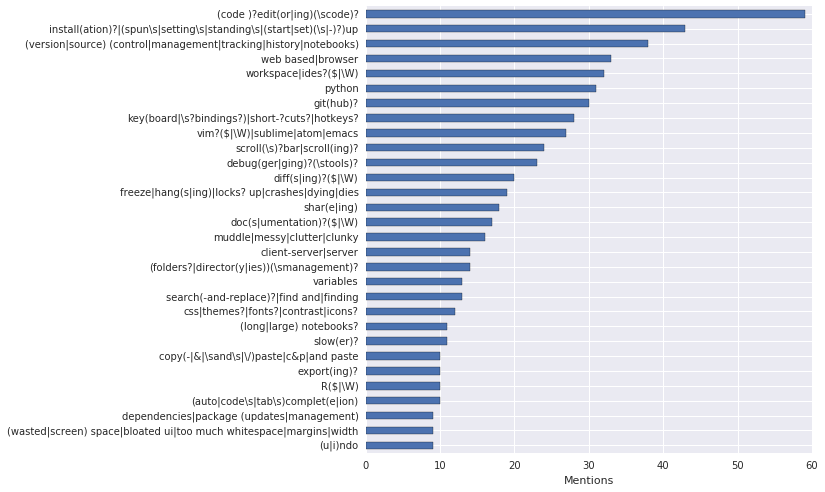

In [27]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [28]:
column = 'difficult_aspects'

In [29]:
themes_df = tagged.themes.to_frame()

In [30]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [31]:
themes_df[column+'_keywords'] = ''

In [32]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [33]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [34]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(theme for theme in themes if theme)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keyword for keyword in keywords if keyword)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [35]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [36]:
themes_df.head()

,difficult_aspects_themes,difficult_aspects_keywords
1,development,diff(s|ing)?($|\W)
5,development,"workspace|ides?($|\W),variables"
6,"hosting,version_control","install(ation)?|(spun\s|setting\s|standing\s|(start|set)(\s|-)?)up,(version|source) (control|management|tracking|history|notebooks)"
7,"dissemination,version_control","report generation,(version|source) (control|management|tracking|history|notebooks)"
10,,


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [37]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [38]:
themes_df.to_csv(column + '_themes.csv', sep=';')